In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

train.drop(columns = "index" ,axis=1,inplace=True)
test .drop(columns = "index",axis=1,inplace=True)

train.drop('FLAG_MOBIL',axis=1,inplace=True)
test .drop('FLAG_MOBIL',axis=1,inplace=True)

In [83]:
train['occyp_type'] = train['occyp_type'].fillna('NAN')
test['occyp_type']  = test['occyp_type'] .fillna('NAN')

In [14]:
train_df = train.copy()
test_df = test.copy()

In [15]:
train_df.loc[(train_df.DAYS_EMPLOYED)>0,'DAYS_EMPLOYED'] = 0
test_df .loc[(test_df .DAYS_EMPLOYED)>0,'DAYS_EMPLOYED'] = 0


train_df['DAYS_BIRTH']    = round(train_df['DAYS_BIRTH']    / -365)
train_df['DAYS_EMPLOYED'] = round(train_df['DAYS_EMPLOYED'] / -365)
train_df['begin_month']   = train_df['begin_month']   * -1

test_df['DAYS_BIRTH']    = round(test_df['DAYS_BIRTH']    / -365)
test_df['DAYS_EMPLOYED'] = round(test_df['DAYS_EMPLOYED'] / -365)
test_df['begin_month']   = test_df['begin_month']   * -1

In [18]:
train_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.0,13.0,0,0,0,NAN,2.0,6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.0,4.0,0,0,1,Laborers,3.0,5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.0,12.0,0,1,0,Managers,2.0,22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.0,6.0,0,1,0,Sales staff,2.0,37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.0,6.0,0,0,0,Managers,2.0,26.0,2.0


In [19]:
train_df.loc[train_df['child_num'] > 2,'child_num'] = 3
test_df .loc[test_df['child_num']  > 2,'child_num'] = 3
train_df['child_num'].value_counts()

0    18340
1     5386
2     2362
3      369
Name: child_num, dtype: int64

In [20]:
train_df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

## EDA

- 종속변수 클래스 별로 차이가 확실한 변수를 선정하는 것이 목표

## 명목 변수

In [40]:
import seaborn as sns

In [30]:
object_features = ['gender','car','reality',"family_type",  "income_type", "house_type", "edu_type", "occyp_type"]

### 독립변수 내 항목 당 차이 확인

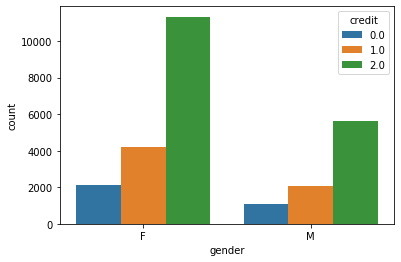

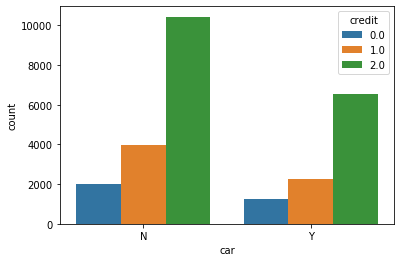

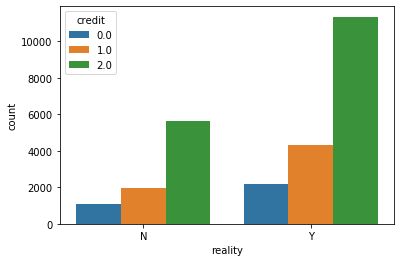

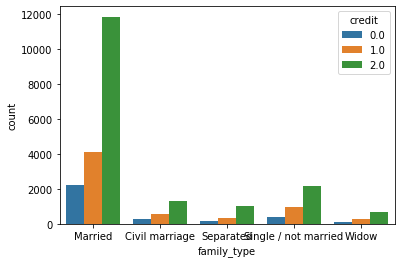

In [73]:
# 변수는 뒤에 따로

for i in object_features:
    if i == "house_type":
        break
    sns.countplot(data=train_df,x=i,hue='credit')
    plt.show()

- 성별, 차량 소유, 부동산 변수는 항목별로 어느정도 차이를 보임 -> 종속변수 클래스 별로도 차이가 있음
- 원핫 인코딩 변수들은 각 항목별로 평가
- family_type 변수는 Married 뱐수가 종속변수 클래스 별로 큰 차이를 보이고 나머지 항목과 많은 차이를 보임 ->Married 변수만 따로 쓰는것도 괜찮아 보임 / 그외에 변수들도 Married만큼은 아니지만 클래스별로 차이를 보임

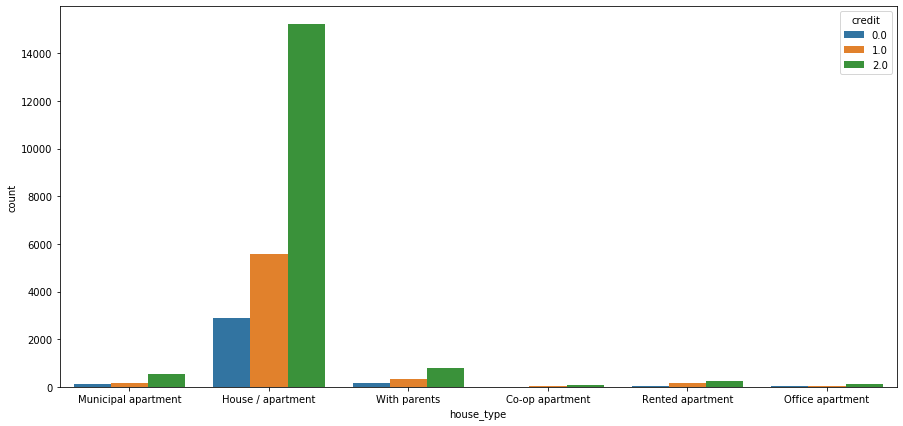

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_df,x="house_type",hue='credit')
plt.show()

- House/apartment 외에 다른 변수는 큰 차이를 보이지 않음

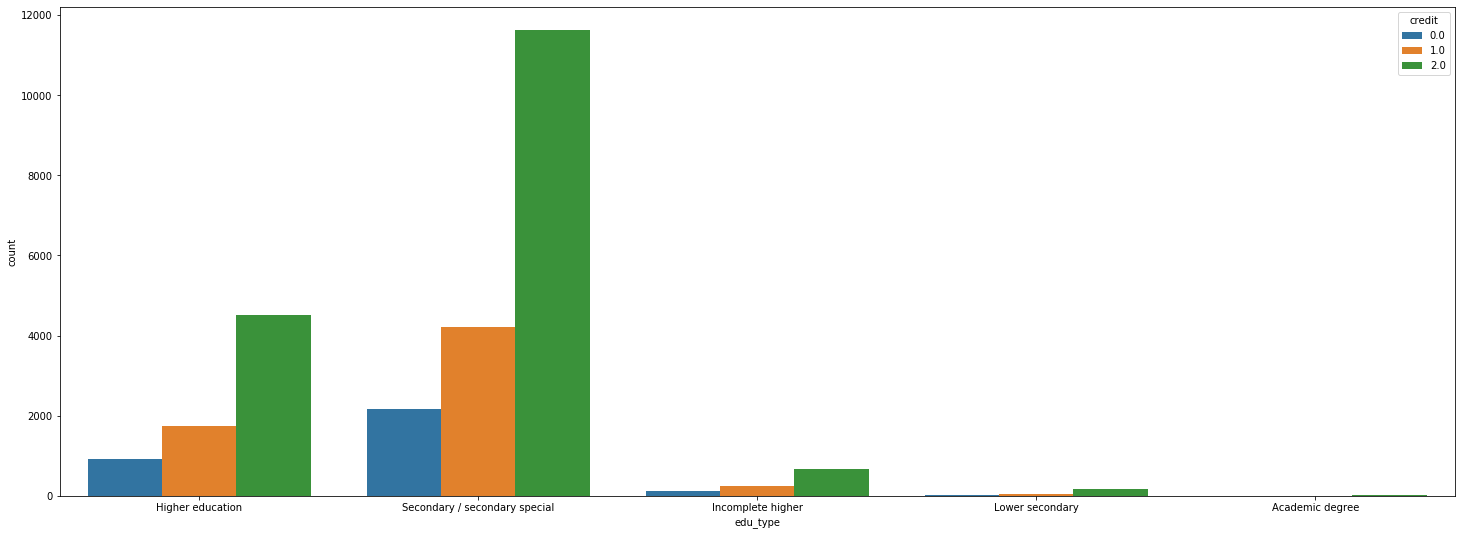

In [63]:
plt.figure(figsize=(25,9))
sns.countplot(data=train_df,x='edu_type',hue='credit')
plt.show()

- Higher education과 secondary/secondary special 변수가 각 종속 클래스 별로 유의한 차이를 보임
- 나머지 항목은 종속변수 클래스 별로 차이가 미미함

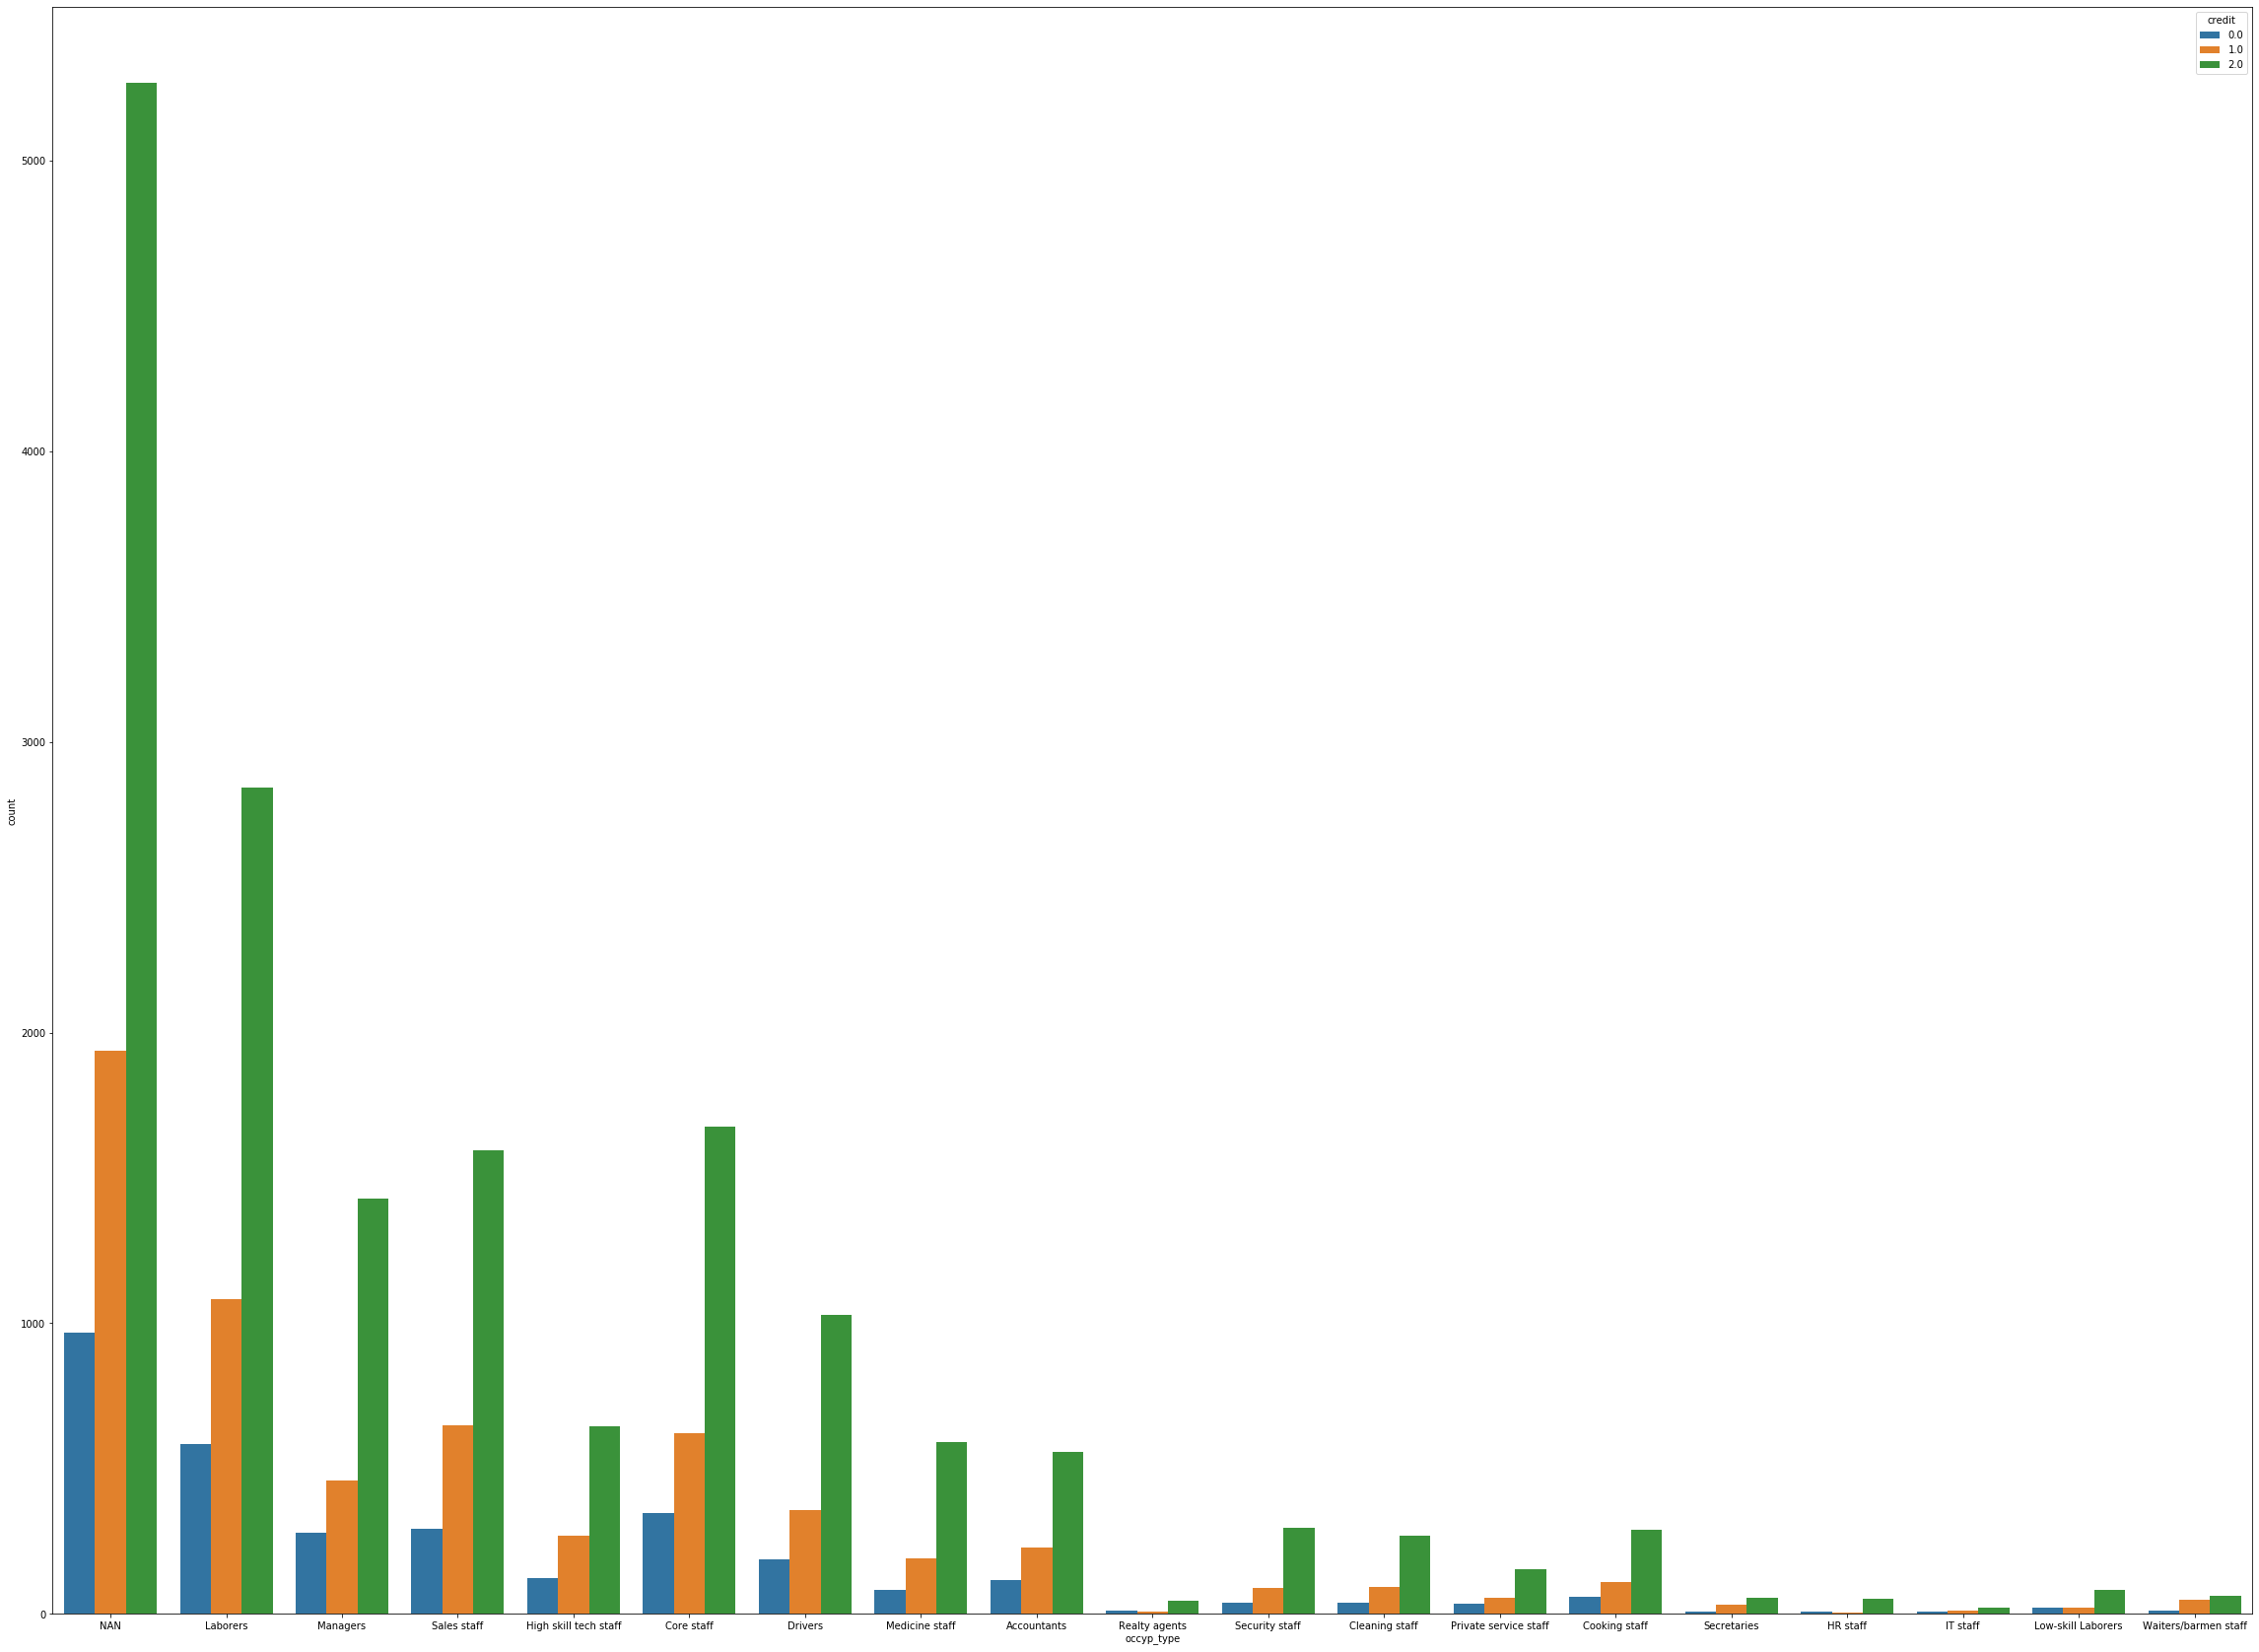

In [82]:
plt.figure(figsize=(40,30))
sns.countplot(data=train_df,x='occyp_type',hue='credit')
plt.show()

- 직업들 대부분이 유의한 차이를 보이지만 몇몇 변수들은 차이가 적음
- (보이는 것만) "Reality agents", "Secretaries",'HR staff", 'IT staff','Low_skill Laborers' 이정도?

## 연속형 변수

In [57]:
linear_features = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size','begin_month']

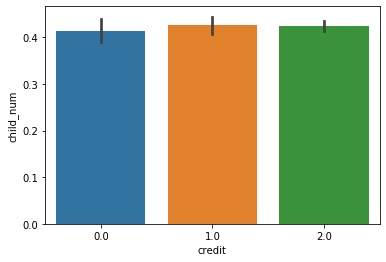

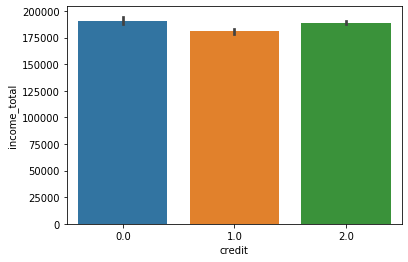

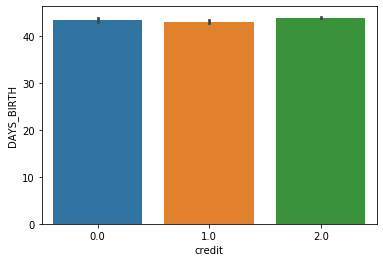

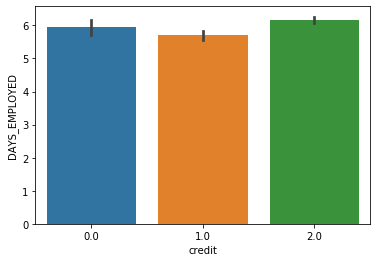

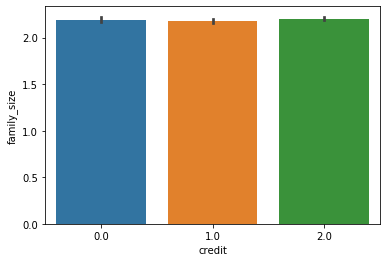

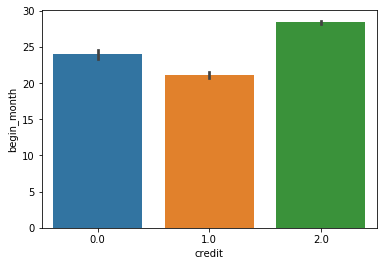

In [58]:
for i in linear_features:
    sns.barplot(data=train_df,x='credit',y=i)
    plt.show()

begin_month 외에 다른 변수들은 클래스 별로 큰 차이를 보이지 않는 듯 보임

### 토의 사항
- 비율별로 보는 것도 괜찮을 듯 보임
- EDA 바탕으로 선정 변수 토의

### 종속변수 별로 해당 변수들의 영향력 차이 확인(참고)

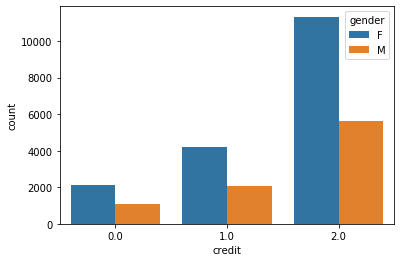

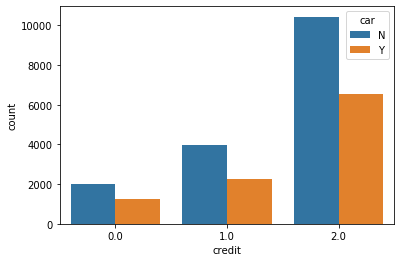

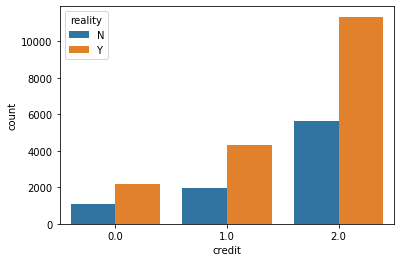

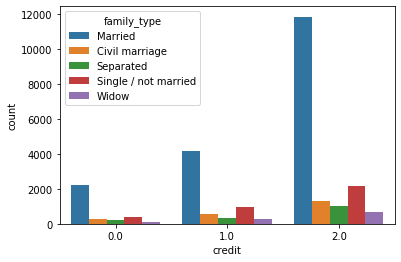

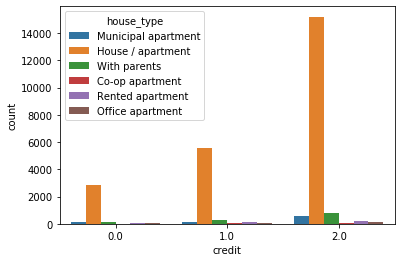

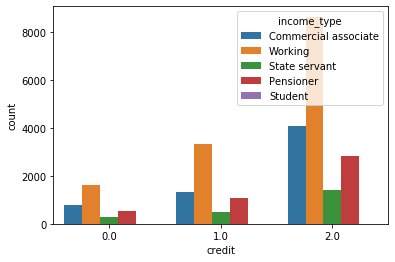

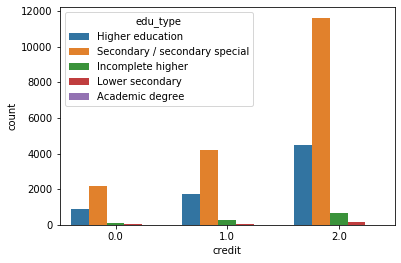

In [43]:
for i in object_features:
    if i == 'occyp_type':
        break
    sns.countplot(data=train_df,x='credit',hue=i)
    plt.show()